In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import seaborn as sns 
import sklearn as sm 

### Load the dataset

In [31]:
data = pd.read_csv("mhs.csv")

In [32]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [33]:
data.shape

(1014, 7)

In [34]:
# select the features

X = data.drop("SystolicBP", axis = 1) # we wouldnt have dropped systolic if we have not been told there exist a target; everything would 
# been the features, so here, we have got all except systolic  

In [35]:
X = pd.get_dummies(X, drop_first=True)

In [36]:
# normalize our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

If for case where there arent need for a normalization, we can convert the pandas dataframe to a numpy array  

data_matrix = pd.Dataframe.to_numpy (X)

### K-Means 

In [37]:
# create an instance of the K-Means
# SSE is a measure of how well k-means will cluster well, a smaller value of the error is key to us 
SSE = [] # sum of square error  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_std)
    SSE.append(kmeans.inertia_)

In [38]:
SSE

[7097.999999999999,
 5463.0667375190205,
 4088.594046089719,
 3340.478199481059,
 2995.546622218333,
 2737.325481959114,
 2499.3455724052405,
 2293.7569731817293,
 2114.660298307848,
 2006.26373538092]

In [39]:
# create a dataframe with no of clusters and SSE 
frame = pd.DataFrame({"Clusters": range(1, 11), "SSE": SSE})
frame   # frame gives us the number of clusters relative its error made in clustering 

,Clusters,SSE
0,1,7098.000000
1,2,5463.066738
2,3,4088.594046
3,4,3340.478199
4,5,2995.546622
5,6,2737.325482
6,7,2499.345572
7,8,2293.756973
8,9,2114.660298
9,10,2006.263735


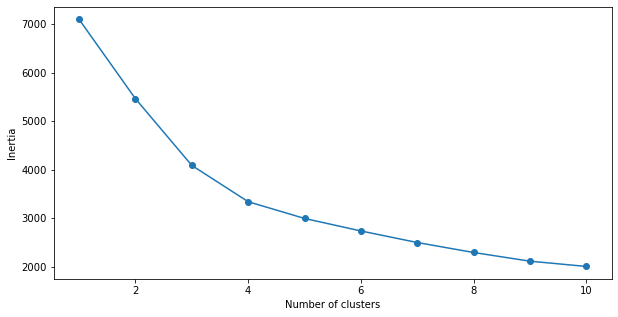

In [40]:
# create a dataframe with no of clusters and SSE 
frame = pd.DataFrame({"Clusters": range(1, 11), "SSE": SSE})
plt.figure(figsize = (10, 5))
plt.plot(frame["Clusters"], frame["SSE"], marker = "o") # This is like plotting df["clusters"] against df["SSE"]
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

At point where the number of cluster = 3, we have got an optimum value for n_cluster to choose becos it starts to plum at that 
Point; hence it is the optimum point 

Inertia is focusing on the mistakes k-means is making while group the data 

At point 3, it will start to cluster well; but at point 4, it will cluster better. Either 3 or 4 will fit  

### re-build the model with the optimal number of clusters or best cluster values for each of data point in the whole data set 

In [41]:
# re-build the model with the optimal number of clusters

kmeans = KMeans(n_clusters=3, random_state = 0) # The optimal no of cluster is the maximum elbow point   

clusters = kmeans.fit_predict(X_std) # This computes cluster center and predict cluster center for each sample; u might have to fit first and later predict 
clusters # becaues we placed clusters as 3; we have got 0, 1,2 as our clustres, although 2 not visibke 

array([0, 0, 1, ..., 0, 0, 1])

In [42]:
len(clusters) # The length of the clusters showed to us the no of clusters or the data points belonging to the 3 clusters 

1014

In [43]:
# Labels her is representing the groups or cluster group or the k-means values  
kmeans.labels_ # this is same as the clusters or rather the predicted cluster values over set of data values 

array([0, 0, 1, ..., 0, 0, 1])

In [44]:
clusters

array([0, 0, 1, ..., 0, 0, 1])

In [45]:
clusters[clusters==2] # this is to see the in bteween value which is not visible 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [46]:
#kmeans = KMeans(n_clusters=3, random_state = 0)
#clusters = kmeans.fit(X_std)
#clusters = kmeans.predict(X_std)
#clusters

In [47]:
# with the clusters gotten, we can then create a new column into the dataset which will give the cluster group each data will belong to 
X["kmeans_cluster"] = clusters 

In [48]:
X.head(5) # As can see here, the first group belongs to cluster o and same for other data points 

,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_low risk,RiskLevel_mid risk,kmeans_cluster
0,25,80,15.0,98.0,86,0,0,0
1,35,90,13.0,98.0,70,0,0,0
2,29,70,8.0,100.0,80,0,0,1
3,30,85,7.0,98.0,70,0,0,1
4,35,60,6.1,98.0,76,1,0,2


Deduction/Observation 

Note that in clustering, there are actually no target values, however, if for case where there is a column with 3 differet class, and say the clusters here too is 
same as the no of clustering; that might just be used to bench or check for accuracy for the clustering. 

The kmeans_clustering is the predicted kmeans clusters 

In [49]:
X.columns

Index(['Age', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel_low risk', 'RiskLevel_mid risk', 'kmeans_cluster'],
      dtype='object')

In [50]:
# Display the clusters predicted by Kmeans  
# sns.FacetGrid(X, x = X[hue = 'Kmeans_cluster')

In [51]:
num_col = X.select_dtypes(include = "number").columns.tolist()

num_col.remove("kmeans_cluster")

<AxesSubplot:xlabel='kmeans_cluster', ylabel='Age'>

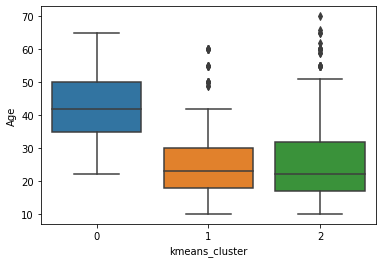

In [52]:
sns.boxplot(x = X["kmeans_cluster"], y = X["Age"])

<AxesSubplot:xlabel='kmeans_cluster', ylabel='BodyTemp'>

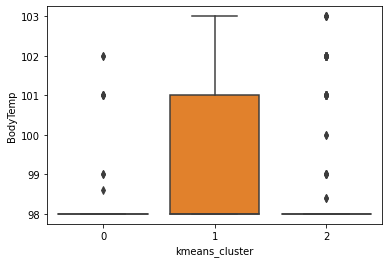

In [63]:
sns.boxplot(x = X["kmeans_cluster"], y = X["BodyTemp"])

<AxesSubplot:xlabel='kmeans_cluster', ylabel='DiastolicBP'>

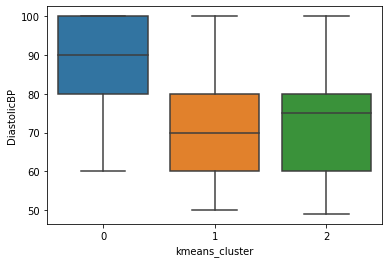

In [62]:
sns.boxplot(x = X["kmeans_cluster"], y = X["DiastolicBP"])

<AxesSubplot:xlabel='kmeans_cluster', ylabel='BS'>

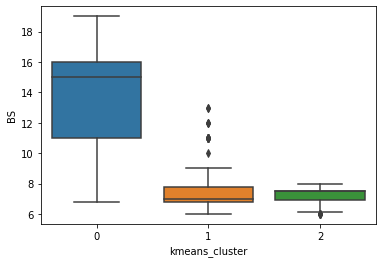

In [64]:
sns.boxplot(x = X["kmeans_cluster"], y = X["BS"])

In [65]:
# examine the groups of patients
# fig, ax = plt.subplots(1, 4, figsize = (16, 6))
# fig.suptitle("Group of patients")

# count = 0

# for i in range(len(num_col)):
#    sns.boxplot(ax = ax[i], x = X["kmeans_cluster"], y = X[num_col[count]])
#    count += 1

# fig.tight_layout()

Deduction 

Clustering have a way of segmenting the data into different group based on their similarities 

Customers are being grouped based on their features. Its clear that people who fall under the cluster 0 are people with median age of 40 and they have diastolic pressure (median) of 90 and  same goes to group 1 with median age of 20 

Better said as they have higher Age band, higher Diastolic pressure, high bs and a very low temperature (Cluster 0) 



### silhouette score

Silhouette is particularly measuring the ability of the model whether k_means or other model to effectively group the data 
Unlike the inertia which measures how much error it makes in grouping the data  

NOTE:
Silhouette score of zero shows an incorrect clustering; from 0.1 shows something is going on in the clustering; hwoever, the 0.1 as a value is also a good score 

The 0.3 value gotten as sihouette shows there exist similarity within the labels or clustering
0.3 is a measure of efectiveness or correctness of the clustering  

In [55]:
# calculate silhouette score
from sklearn.metrics import silhouette_score

sil_scores = []

for i in range(2, 10): # having tried sil value of 1 as min, there was an error flag meaning min cluster is 2  
    kmeans = KMeans(n_clusters=i, random_state=10) # Instantiate the class 
    clusters = kmeans.fit_predict(X_std) # it does both fit and predict concurrently  and note that clustering has nothing to do with target; hence we can only fit and predict the clustering ove the transformed data 
    kmeans_sil = silhouette_score(X_std, clusters) 
    sil_scores.append(kmeans_sil)



In [56]:
sil_scores

[0.26003778323570975,
 0.3252633641653763,
 0.35223579489884327,
 0.2978567466335097,
 0.2957475708576685,
 0.3024228993972288,
 0.31607724882916777,
 0.32073896466059926]

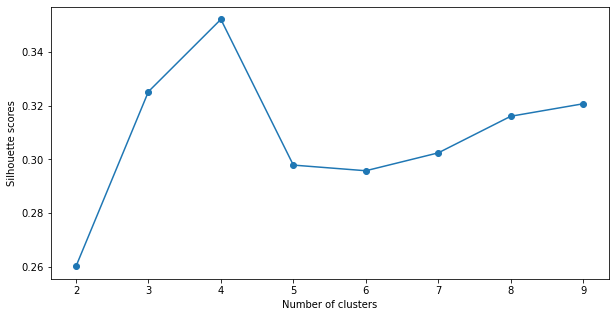

In [57]:
frame2 = pd.DataFrame({"Clusters": range(2, 10), "Sil": sil_scores})


plt.figure(figsize = (10, 5))
plt.plot(frame2["Clusters"], frame2["Sil"], marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette scores")
plt.show()

As can see here the no of clusters with the highest silhoette score is 4; hence, the no of cluster to choose for modelling is 4. Same applicable to inertia
3 or 4 will create the optimum points where we have got elbow N there is a drop in the error made in grouping the data 

## DBSCAN - 

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
dbscan = DBSCAN()

db_labels = dbscan.fit_predict(X_std)

In [60]:
db_labels

array([-1, -1, -1, ..., -1, -1, 31], dtype=int64)

https://www.youtube.com/watch?v=56ZFz6hcSJs